In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

## F measurements

The aim of this notebook is to show the user how to interpret and read the measurements of F from the data files (refer to Section II D 4).

We make the measurements of F for annihilation in the three substructure regimes (SC14, M16, G12) as well as decay publicly available, but for sake of clarity, we will only show how to read and interpret for the case of annihilation in the M16 case. It can be easily generalised for decay and other substrucutre models.

We begin by reading the data file and printing its contents. The data file contains measurements of F and its covariance for the 6 tomagraphic redshift bins for 12 energy bins, and the coadded (total) redshift bin. We also tabulated the effective energy of the 12 energy bins weighted by a spectral index of $\alpha = -2.24$


In [2]:
d = np.load("data/F_annsubmid.npz")
print("File contents:", d.files)
print("Redshift bin name:", d['names'])
print("Measurement shape:", d['F'].shape)
print("Covariance shape:", d['covF'].shape)
print("Effective energies: ", d['Eeff'])
print("Mean redshift:", d['z_mean'])
print("F units:", d['F_units'])
print("Energy units:", d['Energy_units'])

File contents: ['names', 'F', 'covF', 'Eeff', 'z_mean', 'F_units', 'Energy_units']
Redshift bin name: ['gal0' 'gal1' 'gal2' 'gal3' 'gal4' 'gal5' 'total']
Measurement shape: (7, 12)
Covariance shape: (7, 12, 12)
Effective energies:  [  0.70608114   1.29359873   2.24801694   3.9066057    6.52075968
  11.19063184  18.89501006  29.63463478  53.5617316   94.25365366
 187.36854987 534.05806527]
Mean redshift: [0.06415695 0.13496442 0.18685257 0.23646067 0.28633307 0.34014488]
F units: ['cm^-3 GeV^-3 s^-1']
Energy units: ['GeV']


We can plot these measurements as a function of the effective energy 

Text(0.5, 0, '$\\epsilon\\,\\,[{\\rm GeV}]$')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


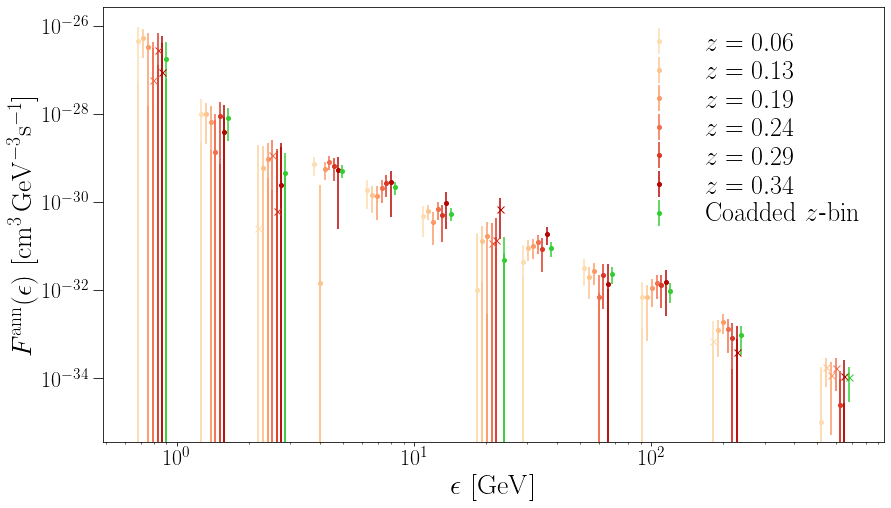

In [3]:
fig = plt.figure(figsize = (14,8))
colors = plt.cm.OrRd(np.linspace(0.2, 1, 7))
Eeff = d['Eeff']

for i, (F, cov_F) in enumerate(zip(d['F'], d['covF'])):
    Eeff = d['Eeff']
    z_means = d['z_mean']
    if i<6: #Redshift bins 1-6
        plt.errorbar(Eeff*(1+0.05*(i)-0.03), F, yerr=np.sqrt(np.diag(cov_F)), fmt= 'o', color = colors[i], markersize = 4,  
                     label= r'$z=%.2lf$' % z_means[i])
        plt.errorbar(Eeff*(1+0.05*(i)-0.03), -F,yerr=np.sqrt(np.diag(cov_F)), fmt = 'x', color = colors[i], markersize = 7)
    if i == 6: #Coadded Bin
        plt.errorbar(Eeff*(1+0.05*(i)-0.03), F, yerr=np.sqrt(np.diag(cov_F)), fmt= 'o' , color = 'limegreen', 
                    label = r'${\rm Coadded}\,\,z$-${\rm bin}$', markersize = 4) 
        plt.errorbar(Eeff*(1+0.05*(i)-0.03), -F,yerr=np.sqrt(np.diag(cov_F)), fmt = 'x', color = 'limegreen', markersize = 7)
    plt.loglog()
    
plt.legend(frameon=False, ncol = 1, fontsize= 26, labelspacing=0.1, loc = 'upper right')
plt.ylabel(r'$F^{\rm ann}(\epsilon)\,\,[{\rm cm}^3\,{\rm GeV}^{-3}{\rm s}^{-1}]$', fontsize=28)
plt.tick_params(axis='x', which='both', labelsize = 22)
plt.tick_params(axis = 'y',which ='major', labelsize = 22, length = 10)
plt.xlabel(r'$\epsilon\,\,[{\rm GeV}]$', fontsize=28)